# Laboratory practice № 12 (tracking & compensation)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 8

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
import scipy
import cvxpy as cp

In [2]:
from matplotlib import style
style.use('seaborn-v0_8-whitegrid')

## Task 1

In [3]:
A_1 = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 2, 0]
])

B_1 = np.array([
    [0],
    [1],
    [0],
    [1]
])

B_2 = np.array([
    [0, 0, 0, 0],
    [1, 0, 1, 0],
    [0, 0, 0, 0],
    [2, 0, 2, 0]
])

A_2 = np.array([
    [0, 2, 0, 0],
    [-2, 0, 0, 0],
    [0, 0, 0, 3],
    [0, 0, -3, 0]
])

C_2 = np.array([[0, 0, 1, 0]])

D_2 = np.array([[0, 0, 0, 0]])

In [4]:
P = cp.Variable(A_1.shape)
Y = cp.Variable((B_1.shape[1],B_1.shape[0])) 
prob = cp.Problem(cp.Maximize(0),[C_2 @ P + D_2 == 0, P @ A_2 - A_1 @ P == B_1 @ Y + B_2])
prob.solve()

/home/vladislav/.pyenv/versions/3.10.11/envs/control/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


0.0

In [5]:
P.value

array([[ 2.50000000e-01,  0.00000000e+00,  1.11111111e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00,
         3.33333333e-01],
       [-2.98938063e-14,  0.00000000e+00, -2.87075551e-14,
         0.00000000e+00],
       [ 0.00000000e+00, -9.53460721e-14,  0.00000000e+00,
        -1.41148574e-13]])

In [6]:
Y.value

array([[-2.,  0., -2.,  0.]])

In [7]:
def generate_LQR(a,b,q,r):
    k, p, _ = ctrl.lqr(a,b,q,r)
    return -k, p

In [8]:
K_1, _ = generate_LQR(A_1, B_1, np.eye(4), np.eye(1))

In [9]:
K_1

array([[ 1.        ,  3.96076458, -9.34382802, -8.28368674]])

In [11]:
np.linalg.eigvals(A_1 + B_1@K_1)

array([-2.06952682+0.j        , -1.17045465+0.j        ,
       -0.54147035+0.34589422j, -0.54147035-0.34589422j])

In [12]:
K_2 = Y.value - K_1 @ P.value
K_2

array([[-2.25      , -1.98038229, -2.11111111, -1.32025486]])

In [13]:
sys_1 = ctrl.ss(A_1 + B_1@K_1, B_2 + B_1@K_2, C_2, D_2)

In [14]:
time_1 = np.linspace(0,30,int(30/0.005))

In [35]:
w_sys_1 = ctrl.ss(A_2, np.zeros((4,1)), np.zeros((1, 4)), 0)
w_1 = ctrl.initial_response(w_sys_1, X0=[0.5, 0., 0.5, 0.], T=time_1).states

In [36]:
w_1.shape

(4, 6000)

In [37]:
w_1

array([[ 0.5       ,  0.49997499,  0.49989997, ..., -0.47915963,
        -0.47770695, -0.47620649],
       [ 0.        , -0.00500075, -0.010001  , ...,  0.14284974,
         0.14763491,  0.15240531],
       [ 0.5       ,  0.49994373,  0.49977494, ..., -0.21052579,
        -0.21730575, -0.22403681],
       [ 0.        , -0.00750097, -0.01500025, ..., -0.45351835,
        -0.45030901, -0.44699833]])

In [38]:
out_1 = ctrl.forced_response(sys_1,T=time_1,U=w_1)

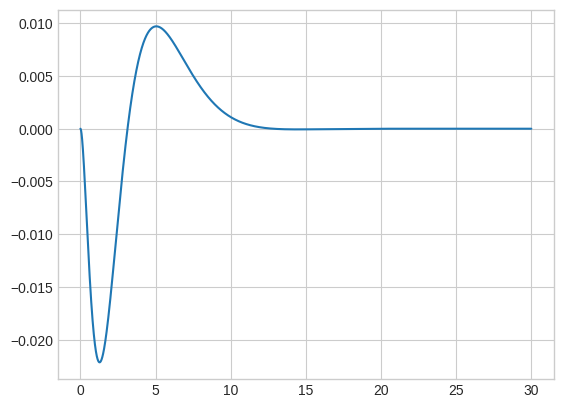

In [39]:
plt.plot(time_1, out_1.outputs[0])